# Sklearn Library Tutorial
***By Alex Borio***



<img src="https://blog.anybox.fr/content/images/size/w1140/2020/01/scikit-learn-1.png" alt="350" width="400" align="left"/>

## Introduzione a Sklearn

`Scikit-learn (Sklearn) is a Machine Learning library that provides data preprocessing, modeling, and model selection tools.`

**Scikit-learn provides many unsupervised and supervised learning algorithms.**

It’s built upon some of the technology you might already be familiar with, like NumPy, pandas, and Matplotlib!

## Sales Price Prediction with Linear Regression

## Preprocessing workflow e Exploratory Data Analysis (EDA)

This part will take you through the preprocessing workflow. Step by step, feature by feature, you will investigate the dataset and take preprocessing decisions accordingly.

In [1]:
import pandas as pd

data = pd.read_csv("./input/houses_dataset.csv") #read dataset 

#Select only these columns:

data = data[['GrLivArea','BedroomAbvGr','KitchenAbvGr', 'OverallCond','RoofSurface','GarageFinish','CentralAir','ChimneyStyle','MoSold','SalePrice']]

data.head() #first 5 rows

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,ChimneyStyle,MoSold,SalePrice
0,1710,3,1,5,1995.0,RFn,Y,bricks,2,208500
1,1262,3,1,8,874.0,RFn,Y,bricks,5,181500
2,1786,3,1,5,1593.0,RFn,Y,castiron,9,223500
3,1717,3,1,5,2566.0,Unf,Y,castiron,2,140000
4,2198,4,1,5,3130.0,RFn,Y,bricks,12,250000


In [2]:
data.shape #1760 rows, 10 columns

(1760, 10)

### 1. Removing Duplicates

The identification and removal of duplicates will improve the quality of the data for your analysis which will lead to higher accuracy.

In [3]:
duplicate_count = len(data)-len(data.drop_duplicates()) # Original data length (n. rows) - data length without duplicates

duplicate_count

300

Remove the duplicates from the dataset. Overwrite the dataframe data.

In [4]:
# You can Drop duplicates inplace or overwrite data simply like this: data= data.drop_duplicates()

data.drop_duplicates(inplace=True) 

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,ChimneyStyle,MoSold,SalePrice
0,1710,3,1,5,1995.0,RFn,Y,bricks,2,208500
1,1262,3,1,8,874.0,RFn,Y,bricks,5,181500
2,1786,3,1,5,1593.0,RFn,Y,castiron,9,223500
3,1717,3,1,5,2566.0,Unf,Y,castiron,2,140000
4,2198,4,1,5,3130.0,RFn,Y,bricks,12,250000


In [5]:
data.shape

(1460, 10)

### 2. Missing data 

**Common representations:**
    
- NaN (not a number)
- Large negatives (-99,-999)
- ?
- Infinity

Print out the percentage % of missing values for all columns of the dataframe.

In [6]:
data.isnull().sum().sort_values(ascending=False)/len(data) #NaN percentage for each column

GarageFinish    0.055479
RoofSurface     0.006164
GrLivArea       0.000000
BedroomAbvGr    0.000000
KitchenAbvGr    0.000000
OverallCond     0.000000
CentralAir      0.000000
ChimneyStyle    0.000000
MoSold          0.000000
SalePrice       0.000000
dtype: float64

#### 3 options to deal with missing values

1. Drop the column entirely

2. Impute the column median using Sklearn's SimpleImputer

Suggestion:

- Greater than 30% of values missing: Potentially drop feature or row
- Less than 30% of values missing: impute a value that makes sense e.g. Median, mean, mode.

3. Preserve the NaNs and replace them with meaningful values

#### GarageFinish

Investigate the missing values in `GarageFinish`. 


Make changes effective in the dataframe data.

According to the dataset description, **the missing values in GarageFinish represent a house having no garage**. They need to be encoded as such.


In [7]:
import numpy as np

data['GarageFinish'].replace(np.nan, "NoGarage", inplace=True) #Replace NaN by "NoGarage"

C:\Users\Alex Borio\AppData\Local\Temp\ipykernel_16936\342594405.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['GarageFinish'].replace(np.nan, "NoGarage", inplace=True) #Replace NaN by "NoGarage"


In [8]:
data['GarageFinish'].isnull().sum()

0

#### RoofSurface

Investigate the missing values in `RoofSurface`. 

Make changes effective in the dataframe data.

**Hint**

`RoofSurface` has a few missing values that can be imputed by the median value.


In [9]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median") # Instanciate a SimpleImputer object with strategy of choice

data['RoofSurface'] = imputer.fit_transform(data[['RoofSurface']]) # Call the "fit_transform" method on the object

When you are done, print out the percentage of missing values for the entire dataframe.

In [10]:
data['RoofSurface'].isnull().sum()

0

Be careful: not all missing values are represented as `np.nans`, and Python's `isnull()` only detects `np.nans`

#### ChimneyStyle

Investigate the missing values in `ChimneyStyle`. Then, choose one of the following solutions:

Make changes effective in the dataframe data.

**Hint**

`ChimneyStyle` has a lot of missing values. The description does not touch on what they represent. As such, **it is better not to make any assumptions and to drop the column entirely.**


In [11]:
data['ChimneyStyle'].replace("?", np.nan, inplace=True) #1st option

#data['ChimneyStyle'] = data['ChimneyStyle'].apply(lambda x: np.nan if x == '?' else x) #2 option with apply()

C:\Users\Alex Borio\AppData\Local\Temp\ipykernel_16936\159506957.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ChimneyStyle'].replace("?", np.nan, inplace=True) #1st option


In [12]:
data['ChimneyStyle'].isnull().sum()/len(data)

0.9965753424657534

In [13]:
data.drop(columns='ChimneyStyle', inplace=True) # Drop ChimneyStyle column 

In [14]:
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,1710,3,1,5,1995.0,RFn,Y,2,208500
1,1262,3,1,8,874.0,RFn,Y,5,181500
2,1786,3,1,5,1593.0,RFn,Y,9,223500
3,1717,3,1,5,2566.0,Unf,Y,2,140000
4,2198,4,1,5,3130.0,RFn,Y,12,250000


### 3. Feature Scaling


**What is Feature Scaling?** 

Feature Scaling is a technique used to transform features values into a common, smaller range.

**Why Feature Scaling?**

1. Datasets have many features with a wide range of values like for example let’s consider our house price prediction dataset. It will have many features like no. of. bedrooms, square feet area of the house, etc.

As you can guess, the number of bedrooms will vary between 1 and 5, but the square feet area will range from 500-2000 etc. <u>**This is a huge difference in the range of both features.**</u>

Many machine learning algorithms that are using Euclidean distance as a metric to calculate the similarities will fail to give a reasonable recognition to the smaller feature, in this case, the number of bedrooms, which in the real case can turn out to be an actually important metric.

Eg: Linear Regression, Logistic Regression, KNN


2. Another important aspect is that Feature Scaling improves computational efficiency!

**In fact scaling the features makes the flow of gradient descent smooth and helps algorithms quickly reach the minima of the cost function.**

#### 3 Possible Scaling Techniques:

1. Standard Scaling

2. MinMax Scaling

3. Robust Scaling

####  1. Standardizing (Standardscaler with Sklearn)

Transforms a feature so that it has a mean value of 0 and a standard deviation of 1.

In standardization, we calculate the z-value for each of the data points and replaces those with these values.

##### The effect of standardization

<img src="https://github.com/lorisliusso/Machine-Learning-with-Python/blob/master/scaling.png?raw=true" alt="400" width="550" align="left"/>

**PROS**
    
Most efficient when data is normally distributed

**CONS**

Sensitive to outliers

####  2. Normalizing: (MinMaxScaler with Sklearn)

The feature values are compressed in a fixed range [0,1].

In min-max you will subtract the minimum value in the dataset with all the values and then divide this by the range of the dataset (maximum-minimum).

<img src="https://cdn.educba.com/academy/wp-content/uploads/2019/05/Normalization-Formula.jpg" alt="400" width="450" align="left"/>



**PROS**
    
Ensures a fixed range, important with distance based algorithms like the K-Nearest Neighbours 

Use it when we data does not have a normal distribution.

**CONS**
    
Doesn't reduce the affect of outliers. Normalization is highly affected by outliers.

Doesn't correct the skewness of a distribution

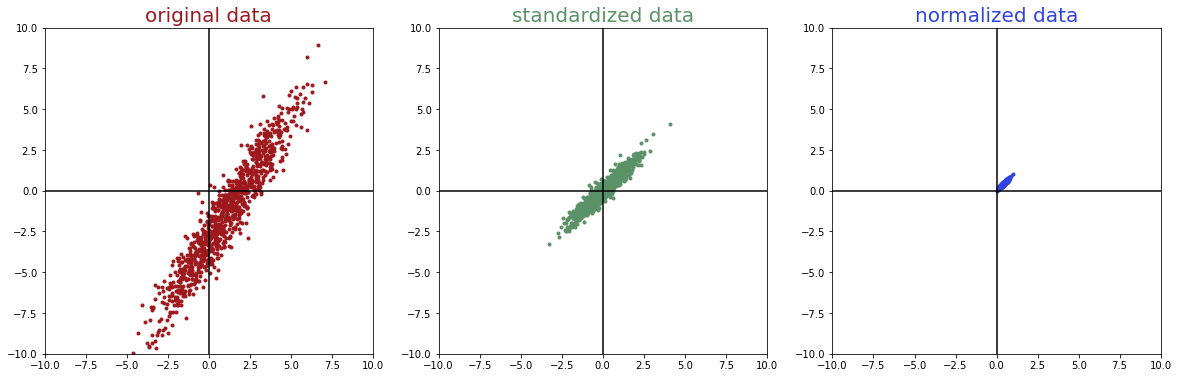

####  3. Robust Scaling (RobustScaler with Sklearn)

<u>What if you're concerned with outliers?</u>

Robust Scaling uses central tendency metrics that are less sensitive to outliers.


<img src="https://github.com/lorisliusso/Machine-Learning-with-Python/blob/master/Robustscaled.png?raw=true" alt="400" width="500" align="left"/>



Robustscaler scales features using statistics that are robust to outliers. This method removes the median and scales the data in the range between 1st quartile and 3rd quartile. i.e., in between 25th quantile and 75th quantile range. This range is also called an Interquartile range. 

**PROS**
    
<u>When data has outliers.</u>

##### Feature Scaling with Sklearn

#####  RoofSurface

Investigate `RoofSurface` for distribution and outliers. 

<u>Replace the original columns with the transformed values.</u>

array([[<Axes: title={'center': 'RoofSurface'}>]], dtype=object)

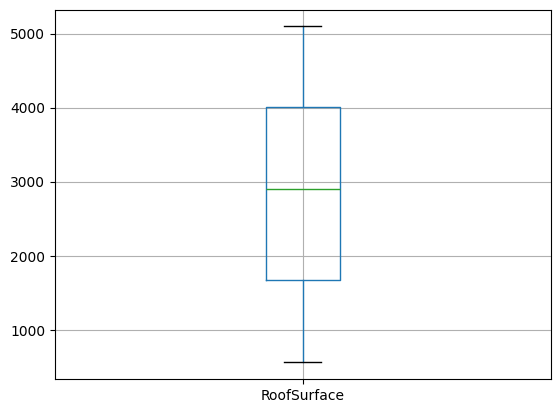

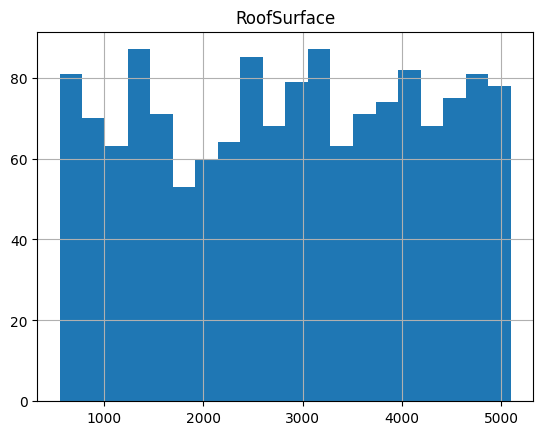

In [15]:
data[['RoofSurface']].boxplot()
data[['RoofSurface']].hist(bins=20)

**Hint**

Since `RoofSurface` does not seem to have a normal distribution, it is better to MinMax scale

In [16]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler().fit(data[['RoofSurface']]) # fit: Compute the minimum and maximum to be used for later scaling.

data['RoofSurface']= minmaxscaler.transform(data[['RoofSurface']]) #transform data values

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,1710,3,1,5,0.316729,RFn,Y,2,208500
1,1262,3,1,8,0.069650,RFn,Y,5,181500
2,1786,3,1,5,0.228124,RFn,Y,9,223500
3,1717,3,1,5,0.442583,Unf,Y,2,140000
4,2198,4,1,5,0.566894,RFn,Y,12,250000


In [17]:
#Alternativa: (DIRETTAMENTE USANDO METODO .fit_transform())

#minmaxscaler = MinMaxScaler()

#data['RoofSurface']= minmaxscaler.fit_transform(data[['RoofSurface']])

##### GrLivArea

Investigate `GrLivArea` for distribution and outliers. 

Replace the original columns with the transformed values.

In [17]:
data[['GrLivArea']].boxplot()
data[['GrLivArea']].hist(bins=20)

array([[<Axes: title={'center': 'GrLivArea'}>]], dtype=object)

**Hint**

`GrLivArea` has a normal distribution, and some outliers. It needs to be Robust scaled.

In [18]:
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler().fit(data[['GrLivArea']])

data['GrLivArea'] = rb_scaler.transform(data[['GrLivArea']])

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,0.380070,3,1,5,0.316729,RFn,Y,2,208500
1,-0.312090,3,1,8,0.069650,RFn,Y,5,181500
2,0.497489,3,1,5,0.228124,RFn,Y,9,223500
3,0.390885,3,1,5,0.442583,Unf,Y,2,140000
4,1.134029,4,1,5,0.566894,RFn,Y,12,250000


##### BedroomAbvGr,  OverallCond & KitchenAbvGr

Investigate `BedroomAbvGr`, `OverallCond` & `KitchenAbvGr`. 

Replace the original columns with the transformed values.

**Hint**

`BedroomAbvGr`, `OverallCond` & `KitchenAbvGr` are ordinal features that can be MinMax scaled.


In [19]:
minmaxscaler_2 = MinMaxScaler()

data[['BedroomAbvGr','OverallCond','KitchenAbvGr']] =  minmaxscaler_2.fit_transform(data[['BedroomAbvGr','OverallCond','KitchenAbvGr']])

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,0.380070,0.375,0.333333,0.500,0.316729,RFn,Y,2,208500
1,-0.312090,0.375,0.333333,0.875,0.069650,RFn,Y,5,181500
2,0.497489,0.375,0.333333,0.500,0.228124,RFn,Y,9,223500
3,0.390885,0.375,0.333333,0.500,0.442583,Unf,Y,2,140000
4,1.134029,0.500,0.333333,0.500,0.566894,RFn,Y,12,250000


#### 4. Encoding

<u>Since most machine learning models only accept numerical variables, preprocessing the categorical variables becomes a necessary step. </u>

**We need to convert these categorical variables to numbers such that the model is able to understand and extract valuable information.**

Encoding consists of transforming non-numerical data/categorical data to an equivalent numerical form.


**2 Main Techniques:**

1. One-Hot Encoding

2. Ordinal Encoding

##### One Hot Encoding

**We use this categorical data encoding technique when the categorical features are `nominal` (do not have any order).** 

In one hot encoding, for each level of a categorical feature, we create a new variable. 

**Each category is mapped with a binary variable containing either 0 or 1. Here, 0 represents the absence, and 1 represents the presence of that category.**

These newly created binary features are known as Dummy variables. The number of dummy variables depends on the levels present in the categorical variable.

<img src="https://miro.medium.com/max/1400/1*ggtP4a5YaRx6l09KQaYOnw.png" alt="400" width="800" align="left"/>



##### Ordinal Encoding

<u>We use this categorical data encoding technique when the categorical features are `ordinal`.</u>

In this case, retaining <u>**the order is important**</u>. Hence encoding should reflect the sequence.

<img src="https://github.com/lorisliusso/Machine-Learning-with-Python/blob/master/ordinal_encoding.png?raw=true" alt="400" width="400" align="left"/>


##### Encoding with Sklearn

##### GarageFinish

Investigate `GarageFinish` and choose one of the following encoding techniques accordingly:
- Ordinal encoding
- One-Hot encoding

Add the encoding to the dataframe as new colum(s), and remove the original column.

**Hint**

`GarageFinish` ***is a multicategorical feature that must be One hot encoded.***



In [20]:
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,0.380070,0.375,0.333333,0.500,0.316729,RFn,Y,2,208500
1,-0.312090,0.375,0.333333,0.875,0.069650,RFn,Y,5,181500
2,0.497489,0.375,0.333333,0.500,0.228124,RFn,Y,9,223500
3,0.390885,0.375,0.333333,0.500,0.442583,Unf,Y,2,140000
4,1.134029,0.500,0.333333,0.500,0.566894,RFn,Y,12,250000


In [21]:
data['GarageFinish'].unique() # Check unique categories in GarageFinish

array(['RFn', 'Unf', 'Fin', 'NoGarage'], dtype=object)

In [22]:
from sklearn.preprocessing import OneHotEncoder

GarageFinish_ohe = OneHotEncoder(sparse=False) # Instanciate One hot encoder, "sparse" -> Will return sparse matrix if set True else will return an array

# Put encoded columns back in dataframe (remember: ndarray.T, The transposed array)

data['Fin'],data['NoGarage'],data['RFn'],data['Unf']  = GarageFinish_ohe.fit_transform(data[['GarageFinish']]).T # Put encoded columns back in dataframe

data.drop(columns=['GarageFinish'], inplace = True) # Drop original column

data.head()

c:\Users\Alex Borio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,MoSold,SalePrice,Fin,NoGarage,RFn,Unf
0,0.380070,0.375,0.333333,0.500,0.316729,Y,2,208500,0.0,0.0,1.0,0.0
1,-0.312090,0.375,0.333333,0.875,0.069650,Y,5,181500,0.0,0.0,1.0,0.0
2,0.497489,0.375,0.333333,0.500,0.228124,Y,9,223500,0.0,0.0,1.0,0.0
3,0.390885,0.375,0.333333,0.500,0.442583,Y,2,140000,0.0,0.0,0.0,1.0
4,1.134029,0.500,0.333333,0.500,0.566894,Y,12,250000,0.0,0.0,1.0,0.0


##### Encoding CentralAir

Investigate `CentralAir` and choose one of the following encoding techniques accordingly:
- Ordinal encoding
- One-Hot encoding

Replace the original column with the newly generated encoded columns.

**Hint**

`CentralAir` ***is a binary categorical feature.***



In [23]:
data['CentralAir'].unique() # Check unique values of CentralAir

array(['Y', 'N'], dtype=object)

In [24]:
CentralAir_encoder = OneHotEncoder(sparse=False, drop='if_binary', categories=[['N', 'Y']]) # Instanciate encoder

data['CentralAir'] = CentralAir_encoder.fit_transform(data[['CentralAir']]) # Fit encoder and tranform

data.head()

c:\Users\Alex Borio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,MoSold,SalePrice,Fin,NoGarage,RFn,Unf
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,2,208500,0.0,0.0,1.0,0.0
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,5,181500,0.0,0.0,1.0,0.0
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,9,223500,0.0,0.0,1.0,0.0
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,2,140000,0.0,0.0,0.0,1.0
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,12,250000,0.0,0.0,1.0,0.0


In [25]:
data['CentralAir'].unique()

array([1., 0.])

##### MoSold - Cyclical Feature Encoding

Data can be continuous, discrete, categorical, ordinal, but it can also be cyclical. Temporal data is a prime example of that: months, days, minutes. 

**Such data needs specific preprocessing for Machine Learning models to understand and consider its cyclical nature.**

Consider the feature `MoSold`, the month on which the house was sold. If left as is, a model would not understand that after 12 (December) comes 1 (January). It would only consider the values on a linear scale.

The issue here is that the model would consider the difference between 12 and 1 as a 11 gap whereas they is only 1 value apart!

**Advantages of "sine" and "cosine":**


- The sine and cosine functions are **periodic**;

- **They are orthogonal** to each other and cannot be generated from each other.

- **They are operating in [-1, 1] range** which you don't need to normalize in most cases.

- Last but not least, if you utilize them together to compose a **2D vector, they can form an unit circle**.

#### Let's first normalize MoSold values between 0 to 2π and then calculate cosine!

<img src="https://miro.medium.com/max/1400/1*7Y-jyZsaXraHq9IUOVXUBQ.gif" alt="400" width="600" align="left"/>


We will run the cosine function after normalizing x between 0 to 2π, which corresponds to one cosine cycle.

In [26]:
# We normalize x values to match with the 0-2π cycle

data["MoSold"] = 2 * np.pi * (data["MoSold"] / data["MoSold"].max())

In [27]:
data['cos_MoSold'] = np.cos(data['MoSold']) #calculate cosine

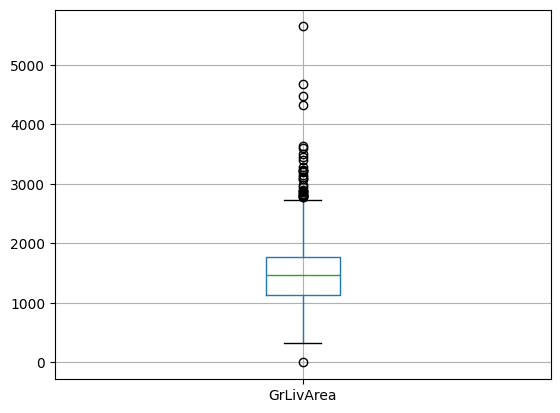

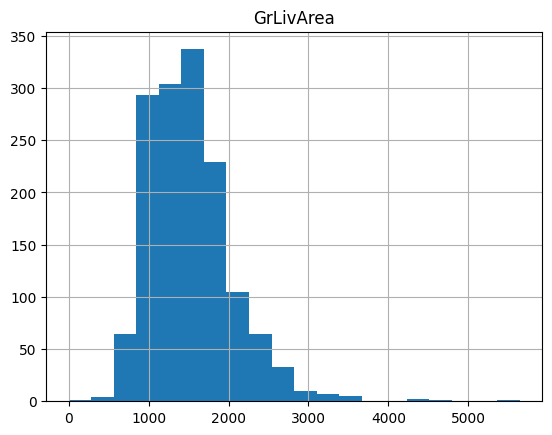

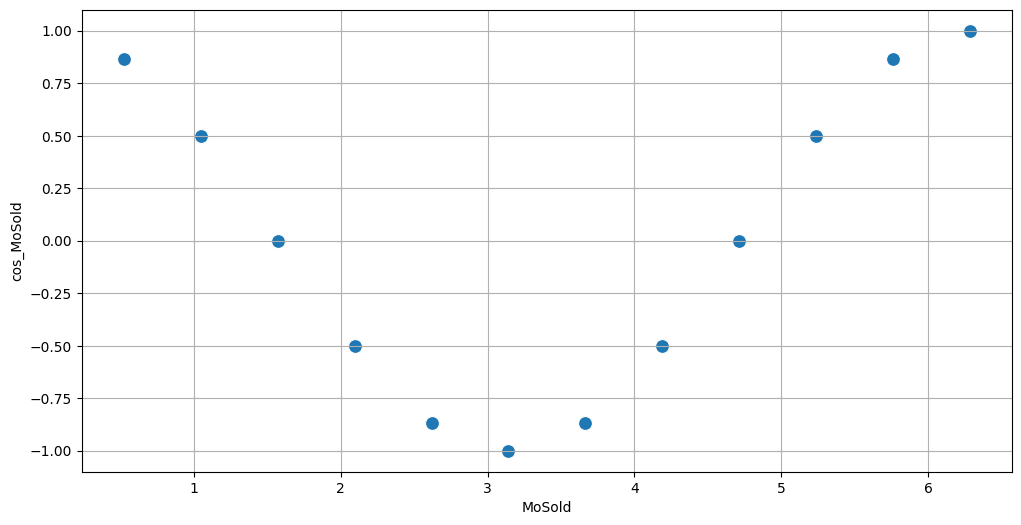

In [28]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(12,6))

plt.grid()

sns.scatterplot(x=data['MoSold'], y=data['cos_MoSold'], data=data, s=100)

plt.show()

**But do you see the new issue we have created?**

Two different months would get the same value

The best way to solve this new problem would be to add another cyclical information to <u>distinguish two times with identical cosine values. We could think of it as a two-axis coordinates system.</u>

**This is probably the right time to call cosine’s brother: SINE!**

In [29]:
data['sin_MoSold'] = np.sin(data['MoSold'])  #calculate sine

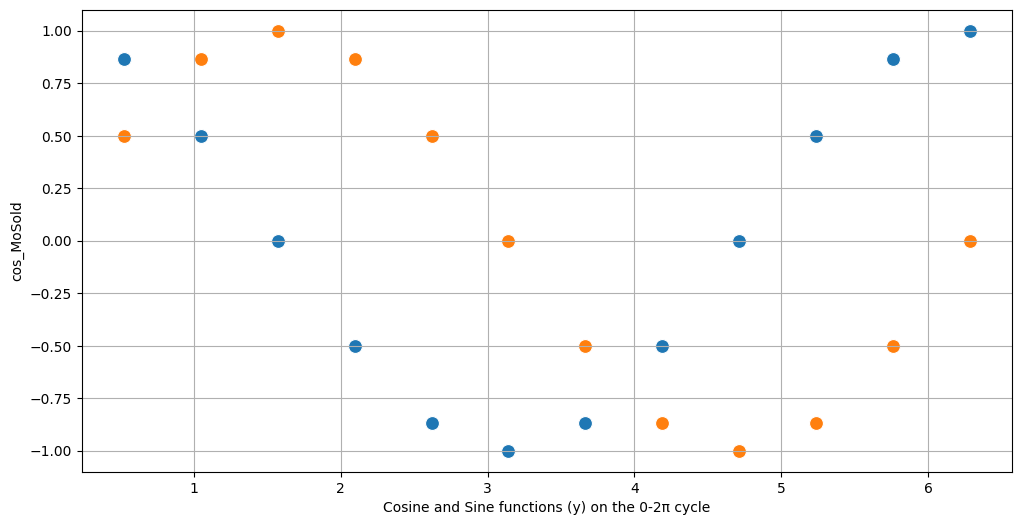

In [30]:
plt.figure(figsize=(12,6))

sns.scatterplot(x=data['MoSold'], y=data['cos_MoSold'], data=data, s=100)
sns.scatterplot(x=data['MoSold'], y=data['sin_MoSold'], data=data, s=100)

plt.xlabel('Cosine and Sine functions (y) on the 0-2π cycle')

plt.grid()

plt.show()


By converting the original values to their corresponding cosine and sine values, we can now assign different coordinates for every month!

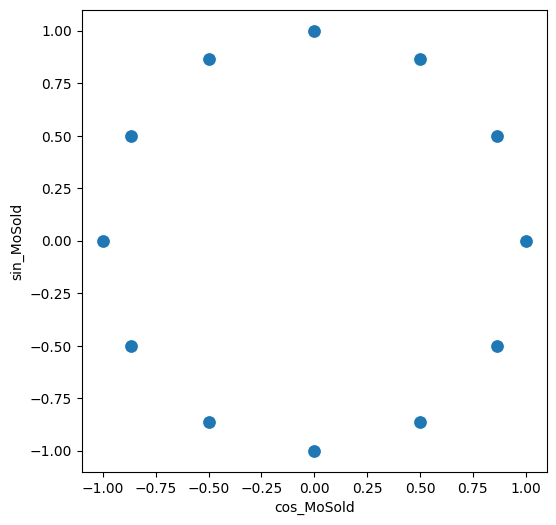

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

sns.scatterplot(x=data['cos_MoSold'], y=data['sin_MoSold'], data=data, s=100)

plt.show()

In [32]:
data.drop(columns=['MoSold'], inplace=True) #drop original column

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,Fin,NoGarage,RFn,Unf,cos_MoSold,sin_MoSold
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,208500,0.0,0.0,1.0,0.0,5.000000e-01,8.660254e-01
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,181500,0.0,0.0,1.0,0.0,-8.660254e-01,5.000000e-01
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,223500,0.0,0.0,1.0,0.0,-1.836970e-16,-1.000000e+00
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,140000,0.0,0.0,0.0,1.0,5.000000e-01,8.660254e-01
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,250000,0.0,0.0,1.0,0.0,1.000000e+00,-2.449294e-16


Is this encoding system perfect? Unfortunately no and here are some reasons why:

- You are converting one information into two features, which will mathematically assign more weight to it from the algorithm perspective.


- Decision trees based algorithms (Random Forest, Gradient Boosted Trees, XGBoost) build their split rules according to one feature at a time. This means that they will fail to process these two features simultaneously whereas the cos/sin values are expected to be considered as one single coordinates system.

#### 5. Feature Selection

##### Collinearity investigation

**What is correlation?**

**The correlation between two variables can be measured with a correlation coefficient which can range between -1 to 1.** 

<u>If the value is 0, the two variables are independent and there is no correlation.</u>


If the measure is extremely close to one of these values, it indicates a linear relationship and highly correlated with each other.


This means a change in one variable is associated with a significant change in other variables.


**What is Multicollinearity?**


<u>Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model which impacts the overall interpretation of the results.</u>

The problem is that we would not be able to examine the individual explanation of the independent variables on the dependent variable.

**When to fix Multicollinearity?**

The good news is that it is not always mandatory to fix the multicollinearity. It all depends on the primary goal of the regression model.

The degree of multicollinearity greatly impacts the p-values and coefficients but not predictions and goodness-of-fit test. If your goal is to perform the predictions and not necessary to understand the significance of the independent variable, it is not a mandate to fix the multicollinearity issue.

**How to test Multicollinearity?**

- Correlation matrix
- Variation Inflation Factor (VIF)


##### Correlation Matrix

Plot a heatmap of the Pearson Correlation between the dataset columns.

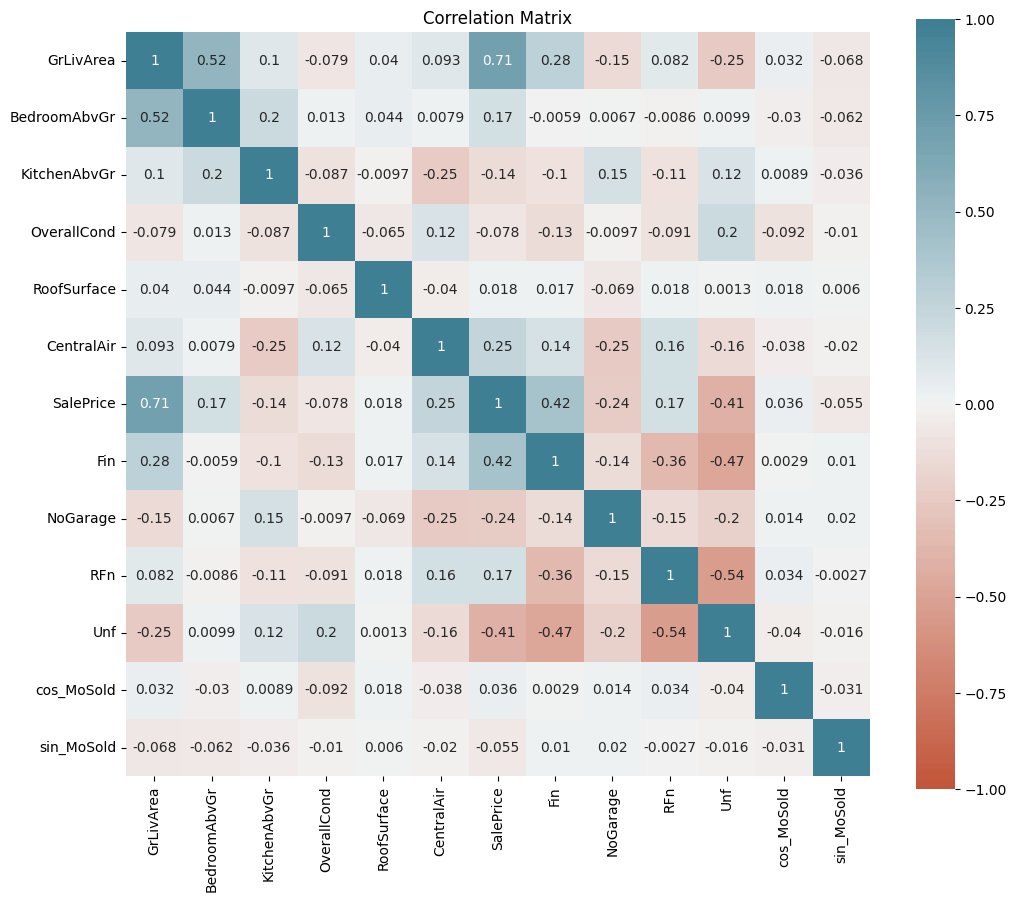

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = data.corr() # Pearson Correlation

plt.figure(figsize=(12, 10))

# Heatmap

sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0, annot=True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

plt.title('Correlation Matrix')

plt.show()

**Visualize the correlation between column pairs in dataframe:**

<img src="https://miro.medium.com/max/1400/1*DYDOif_qBEgtWfFKUDSf0Q.png" alt="400" width="600" align="left"/>


In [34]:
corr_df = corr.stack().reset_index() # Unstack correlation matrix 
corr_df

,level_0,level_1,0
0,GrLivArea,GrLivArea,1.000000
1,GrLivArea,BedroomAbvGr,0.519712
2,GrLivArea,KitchenAbvGr,0.100093
3,GrLivArea,OverallCond,-0.078781
4,GrLivArea,RoofSurface,0.040196
...,...,...,...
164,sin_MoSold,NoGarage,0.019627
165,sin_MoSold,RFn,-0.002677
166,sin_MoSold,Unf,-0.015669
167,sin_MoSold,cos_MoSold,-0.030816


In [36]:
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns

corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation

corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation

corr_df.head(10)

,feature_1,feature_2,correlation
6,GrLivArea,SalePrice,0.707685
78,SalePrice,GrLivArea,0.707685
1,GrLivArea,BedroomAbvGr,0.519712
13,BedroomAbvGr,GrLivArea,0.519712
85,SalePrice,Fin,0.419678
97,Fin,SalePrice,0.419678
91,Fin,GrLivArea,0.284965
7,GrLivArea,Fin,0.284965
83,SalePrice,CentralAir,0.251328
71,CentralAir,SalePrice,0.251328


##### Variance Inflation Factor (VIF)

**The second metric and most common way to detect multicollinearity is by using the variance inflation factor (VIF), which measures the correlation and strength of correlation between the predictor variables in a regression model**

VIFs use multiple regression to calculate the degree of multicollinearity. 

<u>In fact it is obtained by regressing each independent variable, say X on the remaining independent variables and checking how much of it (of X) is explained by these variables.</u>

- VIF starts at 1 and has no upper limit
- VIF = 1, no correlation between the independent variable and the other variables
- VIF exceeding 10 indicates high multicollinearity between this independent variable and the others.

<img src="https://datascience.eu/wp-content/uploads/2021/05/multi-2-5-300x120.png" alt="400" width="300" align="left"/>

<img src="https://www.jmp.com/en_in/statistics-knowledge-portal/what-is-multiple-regression/multicollinearity/_jcr_content/par/styledcontainer_2069/par/lightbox_6722/lightboxImage.img.png/1548351210066.png" alt="400" width="600" align="left"/>


In [35]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif= vif.sort_values(by=['VIF'], ascending=False) #discending order

    return(vif)

In [36]:
calc_vif(data.drop(columns=['SalePrice']))

,variables,VIF
9,Unf,36.992765
8,RFn,24.374633
6,Fin,19.763551
7,NoGarage,5.738975
0,GrLivArea,1.686890
1,BedroomAbvGr,1.490481
5,CentralAir,1.200031
2,KitchenAbvGr,1.157995
3,OverallCond,1.099047
10,cos_MoSold,1.015189


**We can see here that the ‘Fin’,‘RFn’,‘Unf’ have a high VIF value, meaning they can be predicted by other independent variables in the dataset.**

#### Challenges of One-Hot Encoding: Dummy Variable Trap
    
***One-Hot Encoding results in a Dummy Variable Trap as the outcome of one variable can easily be predicted with the help of the remaining variables.***

<u>Dummy Variable Trap is a scenario in which variables are highly correlated to each other.</u>

**The Dummy Variable Trap leads to the problem known as multicollinearity**. 

Multicollinearity occurs where there is a dependency between the independent features.

Multicollinearity is a serious issue in machine learning models like Linear Regression and Logistic Regression.

So, in order to overcome the problem of multicollinearity, one of the dummy variables has to be dropped.

In [37]:
data.drop(columns='Unf', inplace=True) #Let's remove 'Unf' column

## Model Creation

### 1. Create X (features) and y (target)

The objective is to model the Sale price of houses in \$ (`SalePrice`) according to their features.

Create 2 variables for X and y. Remember that X is the feature(s), and y the target.

Prepare the feature set `X` and target `y`. Remember that we want to model the `SalePrice` with the preprocessed features.

In [38]:
X = data.drop(columns=['SalePrice']) #create dataframe with only features
y = data['SalePrice'] #our target

### 2. Cross-Validation

**What is Cross-Validation?**

Cross-validation is a technique for evaluating a Machine Learning model and testing its performance by dividing data into two segments: one used to learn or train a model and the other used to validate the model.

<u>These are the operations:</u>

- Divide the dataset into two parts: one for training, other for testing
- Train the model on the training set
- Validate the model on the test set

<u>There are plenty of CV techniques. Some of them are commonly used, others work only in theory:</u> 

- Hold-out (The holdout method is the simplest kind of cross validation.)
- K-folds
- Leave-one-out
- Leave-p-out
- Stratified K-folds
- Repeated K-folds
- Nested K-folds
- Time series CV

**The most-common form of cross-validation is K-fold cross-validation!**

#### Hold-out Cross-validation

<u>Hold-out cross-validation is the simplest and most common technique.</u> 

**The algorithm of hold-out technique:**

1. Divide the dataset into two parts: the training set and the test set. Usually, 70/80% of the dataset goes to the training set and 20/30% to the test set but you may choose any splitting that suits you better
2. Train the model on the training set
3. Validate on the test set
4. Save the result of the validation

That’s it. 

**We usually use the hold-out method on large datasets as it requires training the model only once.**

It is really easy to implement hold-out using Sklearn.

#### Hold-out- Disadvantages:

- For example, a dataset might not be completely even distribution-wise. 

- If so we may end up in a rough spot after the split. For example, the training set will not represent the test set. Both training and test sets may differ a lot, one of them might be easier or harder. 

- In fact the result obtained by the hold-out technique may be considered inaccurate.

#### Solution: K-Fold Cross-Validation

**K-Fold cross-validation is a technique that minimizes the disadvantages of the hold-out method.**

<u>k-Fold introduces a new way of splitting the dataset which helps to overcome the “test only once bottleneck”.</u>

**The algorithm of the k-Fold technique:**

1. Pick a number of folds – K. Usually, k is 5 or 10.
2. Split the dataset into K equal (if possible) parts (they are called folds)
3. Choose K – 1 folds as the training set. The remaining fold will be the test set
4. Train the model on the training set. On each iteration of cross-validation, you must train a new model independently of the model trained on the previous iteration
5. Validate on the test set
6. Save the result of the validation
7. Repeat steps 3 – 6 k times. Each time use the remaining  fold as the test set. In the end, you should have validated the model on every fold that you have.
8. To get the final score, average all the score results.


<img src="https://github.com/lorisliusso/Machine-Learning-with-Python/blob/master/cross_validation_kfold.png?raw=true" alt="400" width="800" align="left"/>

#### Sklearn | Cross_validate()

Using Sklearn's `cross_validate` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)) function run a 10-fold cross validation on a `LinearRegression` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)) model predicting SalePrice. 

In [39]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

# Instanciate model
model = LinearRegression()

# 10-Fold Cross validate model
cv_results = cross_validate(model, X, y, cv=10)

What is the mean R2 score of the cross validation? Compute your answer and save the value under new variable `mean_score`.

In [40]:
# Mean of R2 scores
mean_score = cv_results['test_score'].mean()
mean_score

0.645895660397344

In [41]:
#min value of R2 scores

min_score= cv_results['test_score'].min()
min_score 

0.47824259087968257

In [42]:
#max value of R2 scores

max_score= cv_results['test_score'].max()
max_score 

0.7310910861744717

#### Sklearn | Cross_val_score()

Cross validate a linear regression model using the **cross_val_score() function**. 

Save the R2 score under variable name `model_score`.

In [43]:
from sklearn.model_selection import cross_val_score 

#use cross_val_score() to run a cross_validation and calculate R2 scores.

scores = cross_val_score(model, X, y, cv=10) 

model_score = scores.mean()

model_score

0.645895660397344

When running a cross-validation, we always look at the mean score as the most robust and representative evaluation of the model's performance.

### 3. Train the Model

**Cross validation does not train a model!**, <u>it evaluates a hypothetical model on the dataset</u>. 


<u>If you want to use the model to, for example, make predictions, you will need to train it outside of the cross validation.</u>

Go ahead and train the model. Save the trained model under the variable `model`.

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [45]:
# Instanciate the model
model = LinearRegression()

# Train the model on the Training data
model.fit(X_train, y_train)

LinearRegression()

What is the `slope` of your trained model? It can be accessed via the model's attributes.

In [46]:
# Slope
slope = model.coef_
slope

array([  72716.7353377 , -135936.31170513, -109033.2930641 ,
         10678.51745734,   -3048.20533977,   26814.65972227,
         42823.81400487,   -8382.58842602,   29582.47877618,
          1903.4045546 ,   -1983.35892629])

What is the `intercept` of your trained model? It can be accessed via the model's attributes. 

In [47]:
# Intercept
intercept = model.intercept_
intercept

213715.90471733472

Let's calculate the R2 metric - We have to predict the X_test to obtain our predictions:

In [48]:
y_pred= model.predict(X_test) #our predictions -> Y= β0 +∑ βiXi

In [49]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred) # (y_true, y_pred)

0.6064780057967287

How are the y_pred values predicted?

In [50]:
#Let's write our predict() function:

X_test_2= X_test.copy()

for i in range(X_test_2.shape[1]):
    
    X_test_2.iloc[:, i]= slope[i] * X_test_2.iloc[:, i]
 

y_pred_2= [sum(X_test_2.iloc[i, :]) + intercept for i in range (X_test_2.shape[0])]

r2_score(y_test, y_pred_2)


0.6064780057967287

### 4. Predict

Use your trained model to predict the sale price of a house with a living area of 1500 square feet. Save the predicted price as variable name `prediction`.

In [51]:
# Instanciate the model

base_model = LinearRegression()

# Train the model on the Training data

base_model.fit(data[['GrLivArea']], data['SalePrice'])

LinearRegression()

In [52]:
#Let's first scale our value: (reuse the previous robust scaler)

scaled_area= rb_scaler.transform([[1500]])
scaled_area

c:\Users\Alex Borio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


array([[0.05561993]])

In [53]:
# Make prediction with model

prediction = base_model.predict(scaled_area)[0]
prediction

c:\Users\Alex Borio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


179347.08886730004

#### Feature Importance - Feature Permutation

With all of the packages and tools available, building a machine learning model isn’t difficult. <u> However, building a good machine learning model is another story.</u>

If you think that machine learning simply involves throwing hundreds of columns of data into a notebook and using scikit-learn to build a model, think again.

**A huge thing that is often ignored is selecting the appropriate features for these models.**



**What is Feature Importance?**

Feature Importance refers to techniques that calculate a score for all the input features for a given model — the scores simply represent the “importance” of each feature.


**A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable.**



**Feature Permutation :**

The idea behind permutation feature importance is simple. 

The feature importance is calculated by noticing the increase or decrease in error when we permute the values of a feature. If permuting the values causes a huge change in the error, it means the feature is important for our model.

There are no complex mathematical formulas behind it.


**The permutation feature importance is based on an algorithm that works as follows:**

1. Trains and records the test score of a base model containing all features
2. Randomly shuffles (permutation) a feature within the test set
3. Records new score on shuffled test set
4. Compares the new score to the original score
5. Repeat for each feature

***If the score drops when a feature is shuffled, it is considered important!.***

<img src="https://www.modulos.ai/wp-content/uploads/2021/07/Feature_Importance_Graphic-1.png" alt="400" width="800" align="left"/>



##### Sklearn - Feature Permutation 

Perform feature permutation, and rank features by order of importance.

In [54]:
from sklearn.inspection import permutation_importance

model = LinearRegression().fit(X_train, y_train) # Fit model

permutation_score = permutation_importance(model, X_test, y_test, scoring= 'r2', n_repeats=100) # Perform Permutation

importance_df= pd.DataFrame({'Feature': X.columns, 'Score_Decrease': permutation_score.importances_mean}) #df

importance_df= importance_df[importance_df['Score_Decrease']< 0.01] #let's only keep values close to 0 

importance_df

,Feature,Score_Decrease
3,OverallCond,-0.000239
4,RoofSurface,0.000121
7,NoGarage,0.002290
9,cos_MoSold,-0.000324
10,sin_MoSold,0.000658


Which feature is the most important? The most important feature is `GrLivArea` .

### Reduce complexity model

**Drop the weak features and cross-validate a new model.** You should aim to maintain a score close to the previous one. Save the score under variable name `simplified_model_score`.

In [55]:
X = X.drop(columns=['RoofSurface','sin_MoSold','cos_MoSold','OverallCond','NoGarage']) # Drop weak features

In [56]:
X.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,CentralAir,Fin,RFn
0,0.380070,0.375,0.333333,1.0,0.0,1.0
1,-0.312090,0.375,0.333333,1.0,0.0,1.0
2,0.497489,0.375,0.333333,1.0,0.0,1.0
3,0.390885,0.375,0.333333,1.0,0.0,0.0
4,1.134029,0.500,0.333333,1.0,0.0,1.0


In [57]:
#last R2 score from Cross-validation - > 0.645895660397344

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=10)

simplified_model_score = scores.mean() #R2

simplified_model_score

0.6472738621812246

### The Bias / Variance tradeoff

**For a model to generalize there will be a tradeoff between bias and variance.**

- Bias (Underfitting): The inability for an algorithm to learn the patterns within a dataset.
- Variance (Overfitting): The algorithm generates an overly complex relationship when modeling patterns within a dataset.

<img src="https://miro.medium.com/max/1400/1*9hPX9pAO3jqLrzt0IE3JzA.png" alt="400" width="900" align="left"/>



### No Free Lunch Theorem

<u>Some models oversimplify, while others overcomplicate a relationship between features and target.</u>

It's up to us as data scientists to make assumptions about the data and evaluate reasonable models accordingly.

There is no one-size-fits-all model, this is known as the **No Free Lunch Theorem.**

### Learning Curves

**Learning curves are used to diagnose three aspects of model behaviour on the dataset:**

- Underfitting
- Overfitting
- Whether the model has sufficient data to learn the patterns of the dataset

### Reading the curves

<u>The two curves are plotted together on the same graph.</u>

We can have 3 cases:

#### High bias / Underfitting

- ***Low scores in both training and test sets.***

If the model cannot determine a relationship in the training set, we cannot expect the model to score highly in the test set.

Training and testing scores converge and plateau at a low score. No matter how much data is used for training, the model cannot determine a meaningful relationship.

<img src="https://github.com/lorisliusso/Machine-Learning-with-Python/blob/master/Learning%20Curves%20undefitting.png?raw=trueg" alt="400" width="500" align="left"/>


#### High variance / Overfitting

- High score on training set

- **Low score on test set** 

The model has paid too much attention to both signal and noise, this leads to high training scores.

Reliance on noise does not generalize well on unseen data, resulting in low test scores.



<img src="https://github.com/lorisliusso/Machine-Learning-with-Python/blob/master/Learning%20Curves%20overfitting.png?raw=true" alt="400" width="500" align="left"/>


## Ideal curves

- High score on training set

- High score on test set

- **Converged curves**


<img src="https://github.com/lorisliusso/Machine-Learning-with-Python/blob/master/Learning%20Curves%20ideal.png?raw=true" alt="400" width="500" align="left"/>


### Sklearn | Learning Curves

Learning curves are used to <u>diagnose the performance of the model in more depth.</u>
 
Plot the learning curves of the model ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html)). Use the following `train_sizes`:
- [25,50,75,100,250,500,750,1000,1150]

In [58]:
from sklearn.model_selection import learning_curve

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = LinearRegression(),
                                                              X = X, 
                                                              y = y, 
                                                              train_sizes = [25,50,75,100,250,500,750,1000,1150], 
                                                              cv = 10)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.figure(figsize=(12,7))
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
#plt.xlim([0, 1000])
#plt.ylim([0, 1])
plt.legend();

How would you interpret the Learning Curves?


**The curves have converged:** 

- The model has reached optimal performance with the given data.
- The model is not overfitting (no variance) the training data, it is generalizing well on unseen data.

**The R2 score is around 0.65. Either:**

- The model is biased: it is too simple to learn the patterns of the data
- The model needs more features to get better at predicting the house prices


<u>From the looks of the graph, the testing score stabilizes at a training size of around **300**.</u>

###  Reducing training set size

<u>The more data, the longer the training! </u>

In certain cases, you will be working with enormous datasets.

In those situations, **the learning curves can help you find the right tradeoff between reducing the training size (and training time!) while maintaining a high performing model.**

<u>Select the first 300 rows of the dataset</u> (deemed sufficient by the learning curves) and save them under variable name `reduced_dataset`.

On the `reduced_dataset`, cross-validate a model made to predict sale price (`SalePrice`) with:
- Living area (`GrLivArea`)
- Number of bedrooms (`BedroomAbvGr`)
- Number of kitchens (`KitchenAbvGr`)
- Overall quality (`OverallCond`)

Save the cross validated score under variable name `reduced_dataset_score`.

In [59]:
# Select first 300 rows
reduced_X = X.head(300)
reduced_y = y[0:300]

# Instanciate model
model = LinearRegression()

# 5-Fold Cross validate model
cv_results = cross_validate(model, reduced_X, reduced_y, cv=10)

# Scores
cv_results['test_score']

# Mean of scores
reduced_dataset_score = cv_results['test_score'].mean()

reduced_dataset_score

0.6452412182476934

The score should be nearly the same as with the full dataset!

On the other hand, you'll have reduced the computational expense!!

## Regression Metrics

There are 3 main metric for **model evaluation** in **Regression**:
    
1. R Square/Adjusted R Square

2. Mean Square Error(MSE)/Root Mean Square Error(RMSE)

3. Mean Absolute Error(MAE)

### R Square/Adjusted R Square

R Square measures how much variability in dependent variable can be explained by the model.

<u>It is the square of the Correlation Coefficient(R) and that is why it is called R Square.</u>

- R Square is calculated by the sum of squared of prediction error divided by the total sum of the square which replaces the calculated prediction with mean. 

- R Square value is between 0 to 1 and a bigger value indicates a better fit between prediction and actual value.

<img src="https://github.com/lorisliusso/Machine-Learning-with-Python/blob/master/rsquared_formula.png?raw=true" alt="400" width="700" align="left"/>


- R Square is a good measure to determine how well the model fits the dependent variables. 

***However, it does not take into consideration of overfitting problem. If your regression model has many independent variables, because the model is too complicated, it may fit very well to the training data but performs badly for testing data.*** 

### Mean Square Error(MSE)/Root Mean Square Error(RMSE)

While R Square is a relative measure of how well the model fits dependent variables, 

Mean Square Error is an absolute measure of the goodness for the fit.

MSE is calculated by the sum of square of prediction error which is real output minus predicted output and then divide by the number of data points.

<u>It gives you an absolute number on how much your predicted results deviate from the actual number. </u>

You cannot interpret many insights from one single result but it gives you a real number to compare against other model results and help you select the best regression model.

<img src="https://github.com/lorisliusso/Machine-Learning-with-Python/blob/master/mse_formula.png?raw=true" alt="400" width="550" align="left"/>


**Root Mean Square Error (RMSE) is the square root of MSE. It is used more commonly than MSE because firstly sometimes MSE value can be too big to compare easily.** 

Secondly, MSE is calculated by the square of error, and thus square root brings it back to the same level of prediction error and makes it easier for interpretation.

### Mean Absolute Error(MAE)

Mean Absolute Error(MAE) is similar to Mean Square Error(MSE).

However, instead of the sum of square of error in MSE, MAE is taking the sum of the absolute value of error.


<img src="https://github.com/lorisliusso/Machine-Learning-with-Python/blob/master/mae_formula.png?raw=true" alt="400" width="550" align="left"/>


Compare to MSE or RMSE, **MAE is a more direct representation of sum of error terms.**

MSE gives larger penalization to big prediction error by square it while MAE treats all errors the same.

### Sklearn | Metrics:

In [61]:
# Instanciate model
model = LinearRegression()

# 5-Fold Cross validate model
cv_results = cross_validate(model, reduced_X, reduced_y, 
                            scoring=['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error'], 
                            cv=10 )

#Mean of Scores: R2, RMSE, MAE

r2 = cv_results['test_r2'].mean()

rmse= cv_results['test_neg_root_mean_squared_error'].mean()

mae= cv_results['test_neg_mean_absolute_error'].mean()

print('R2: ', r2)
print('RMSE: ', rmse)
print('MAE: ', mae)

R2:  0.6452412182476934
RMSE:  -41244.59684901128
MAE:  -32263.78157314148


In [62]:
data['SalePrice'].mean()

180921.19589041095